In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/rental/Documents/MachineLearning/assignment5/iris.data")

In [3]:
data.columns = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class']

In [4]:
data.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
X = data[data.columns[:-1]].values
y = data['class'].values

In [6]:
#split 80 20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [7]:
# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

In [8]:
from sklearn.model_selection import KFold

In [9]:
da = KFold(n_splits=5, shuffle=False)
for i,(train_set,test_set)in enumerate(da.split(X)):
    print(train_set,test_set)

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 1

In [10]:
clfold = KNeighborsClassifier(n_neighbors=5)

In [11]:
train = clfold.fit(X_train, y_train)

In [12]:
y_pred = train.predict(X_test)

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
scores = cross_val_score(clfold, X, y, cv=5, scoring = 'accuracy')

In [15]:
print(scores)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [16]:
k = (1,2,3,4,5)

Text(0.5, 1.0, 'Knn K-fold cross validation')

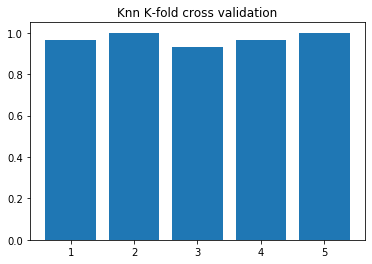

In [17]:
plt.bar(k,scores)
plt.title("Knn K-fold cross validation")

In [18]:
knnmean=(scores.mean())

In [19]:
knnmean

0.9733333333333334

In [20]:
#kfold = model_selection.KFold(n_splits=5, random_state=4)

In [21]:
model_kfold = tree.DecisionTreeClassifier()
model_kfold.fit(X_train,y_train)
y_pred = model_kfold.predict(X_test)

In [22]:
scoresdt = cross_val_score(model_kfold, X, y, cv=5, scoring = 'accuracy')

In [23]:
print(scoresdt)

[0.96666667 0.96666667 0.9        1.         1.        ]


In [24]:
dectree=(scoresdt.mean())

In [25]:
dectree

0.9666666666666668

In [26]:
#results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
#print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

In [27]:
#results_kfold

In [28]:
k = (1,2,3,4,5)

Text(0.5, 1.0, 'Decision Tree Classifier')

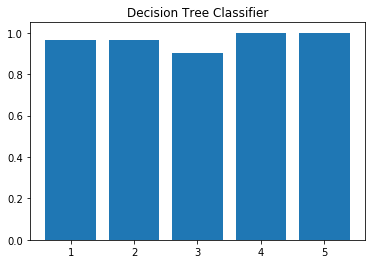

In [29]:
plt.bar(k,scoresdt)
plt.title("Decision Tree Classifier")

# Which classifier is better and why?

The KNN is the better classifier as it has higher accuracy and prediction rate

In [30]:
##

In [46]:
k_range = range(1,15)
scores_list = []

In [47]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring = 'accuracy')
    scores_list.append(scores.mean())
    print(scores_list)

[0.96]
[0.96, 0.9466666666666665]
[0.96, 0.9466666666666665, 0.9666666666666668]
[0.96, 0.9466666666666665, 0.9666666666666668, 0.9733333333333334]
[0.96, 0.9466666666666665, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334]
[0.96, 0.9466666666666665, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001]
[0.96, 0.9466666666666665, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001]
[0.96, 0.9466666666666665, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9666666666666668]
[0.96, 0.9466666666666665, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9666666666666668, 0.9733333333333334]
[0.96, 0.9466666666666665, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001]
[0.96, 0.9466666666666665, 0.9

# The best K value is 6 ie., 0.9800000000000001

In [48]:
scores_list

[0.96,
 0.9466666666666665,
 0.9666666666666668,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9800000000000001,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9800000000000001,
 0.9800000000000001,
 0.9733333333333334,
 0.9666666666666666]

# how K impacts the overall accuracy of kNN on the dataset.

<BarContainer object of 14 artists>

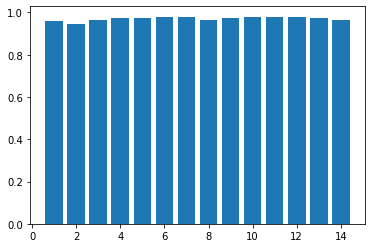

In [49]:
# changing to misclassification error
#MSE = [1 - x for x in cv_scores]

plt.bar(k_range,scores_list)

In [69]:
a = ('KNN', 'DecisionTree')

In [70]:
b = [0.9800000000000001,0.9666666666666668]

Text(0.5, 1.0, 'Comparing best kvalue and Decision Tree')

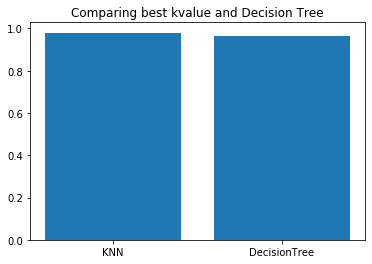

In [72]:
plt.bar(a,b)
plt.title("Comparing best kvalue and Decision Tree")